In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [204]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


#Data Loading

In [205]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv') #https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [206]:
df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
666,16615,Male,76.0,1,0,Yes,Self-employed,Rural,69.61,35.3,never smoked,0
3539,63423,Male,11.0,0,0,No,children,Rural,68.62,18.2,Unknown,0
5052,31836,Female,6.0,0,0,No,children,Urban,91.05,22.1,Unknown,0
1350,60816,Female,82.0,1,0,Yes,Private,Urban,62.46,20.3,formerly smoked,0
1991,13749,Female,38.0,0,0,Yes,Private,Rural,84.79,24.2,formerly smoked,0


In [207]:
df.shape

(5110, 12)

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#Data Preprocessing

/tmp/ipython-input-2589200890.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'], kde=True)


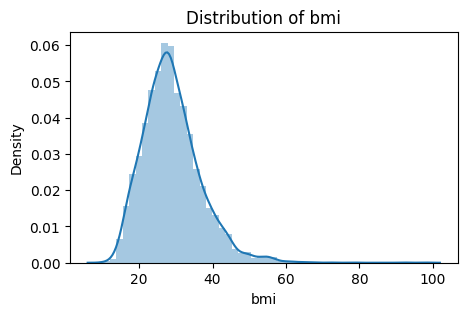

In [209]:
plt.figure(figsize=(5,3))
sns.distplot(df['bmi'], kde=True)
plt.title(f'Distribution of bmi')
plt.xlabel('bmi')
plt.ylabel('Density')
plt.show()

In [210]:
df['bmi'].fillna(df['bmi'].median(), inplace=True)

/tmp/ipython-input-1439978410.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


In [211]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.862035,7.699562,10.30,23.800,28.100,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [212]:
df.drop('id', axis=1, inplace=True)

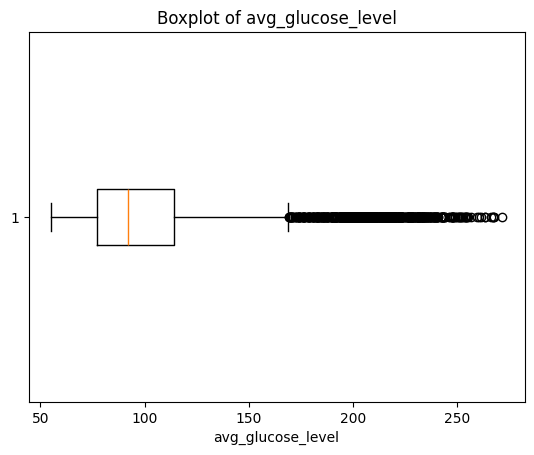

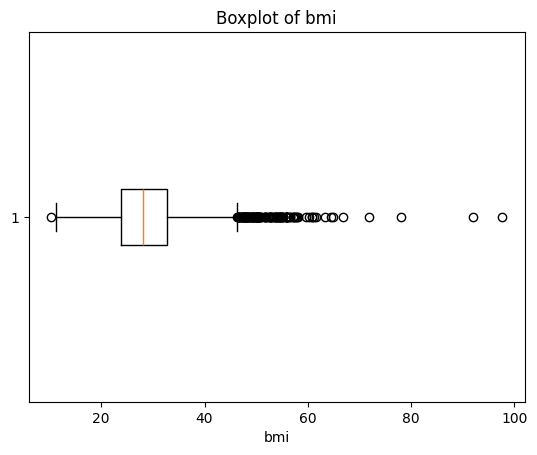

In [213]:
for col in ['avg_glucose_level', 'bmi']:
    plt.figure()
    plt.boxplot(df[col], vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


In [214]:
#avg_glucose_level

Q1_glucose = df['avg_glucose_level'].quantile(0.25)
Q3_glucose = df['avg_glucose_level'].quantile(0.75)
IQR_glucose = Q3_glucose - Q1_glucose

lower_glucose = Q1_glucose - 1.5 * IQR_glucose
upper_glucose = Q3_glucose + 1.5 * IQR_glucose

df['avg_glucose_level'] = df['avg_glucose_level'].clip(
    lower=lower_glucose,
    upper=upper_glucose
)


In [215]:
# bmi outlier capping

Q1_bmi = df['bmi'].quantile(0.25)
Q3_bmi = df['bmi'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi

lower_bmi = Q1_bmi - 1.5 * IQR_bmi
upper_bmi = Q3_bmi + 1.5 * IQR_bmi

df['bmi'] = df['bmi'].clip(
    lower=lower_bmi,
    upper=upper_bmi
)


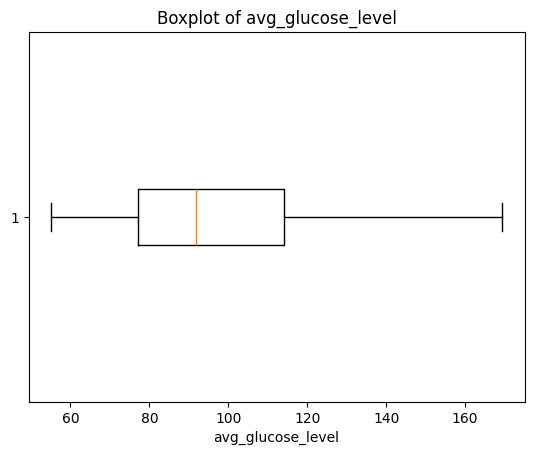

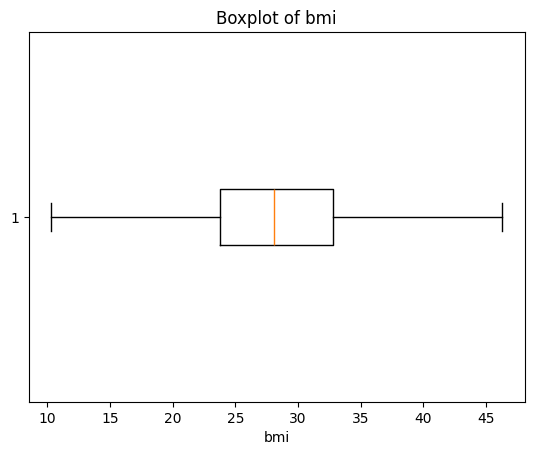

In [216]:
for col in ['avg_glucose_level', 'bmi']:
    plt.figure()
    plt.boxplot(df[col], vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


In [217]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.0000
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.0000
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.0000
avg_glucose_level,5110.0,100.996204,33.214738,55.12,77.245,91.885,114.09,169.3575
bmi,5110.0,28.690411,7.120858,10.30,23.800,28.100,32.80,46.3000
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.0000


In [218]:
def age_group(age):
    if age < 20:
        return 'young'
    elif age < 40:
        return 'adult'
    elif age < 60:
        return 'middle_aged'
    else:
        return 'senior'

df['age_group'] = df['age'].apply(age_group)


In [219]:
df.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
4992,Female,44.0,0,0,Yes,Private,Rural,56.85,24.4,never smoked,0,middle_aged
2330,Male,42.0,0,0,Yes,Private,Rural,89.22,46.3,Unknown,0,middle_aged
1669,Male,58.0,0,0,Yes,Private,Urban,94.00,28.1,Unknown,0,middle_aged
2396,Female,41.0,0,0,Yes,Private,Rural,134.29,26.8,smokes,0,middle_aged
3438,Male,16.0,0,0,No,Private,Rural,125.89,21.3,never smoked,0,young


# preprocesor pipeline

In [220]:
X = df.drop(columns=['stroke'])
Y = df['stroke']

In [221]:
df.drop(columns=['stroke'],axis=1,inplace=True)

In [222]:
df.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,age_group
1848,Male,37.0,0,0,Yes,Private,Rural,118.21,23.6,Unknown,adult
4585,Male,9.0,0,0,No,children,Urban,75.84,21.5,Unknown,young
3972,Male,15.0,0,0,No,Never_worked,Urban,64.29,16.7,Unknown,young
3264,Female,61.0,0,0,Yes,Private,Rural,72.01,26.0,formerly smoked,senior
3657,Male,4.0,0,0,No,children,Rural,100.19,18.7,Unknown,young


In [223]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
print(num_cols)
print(cat_cols)

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')
Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status', 'age_group'],
      dtype='object')


In [224]:
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

In [225]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [226]:
preprocessor = ColumnTransformer(transformers=[
    ('num',num_transformer,num_cols),
    ('cat',cat_transformer,cat_cols)
])

In [227]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Primary Model Selection

In [228]:
#model selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [229]:
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, accuracy_score, confusion_matrix

In [230]:
lr = LogisticRegression()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

In [231]:
model_to_run = {
    'Logistic Regression': lr,
    'Random Forest': rf,
    'Gradient Boosting': gb
}

#Model Training

In [232]:
res = []

for name,model in model_to_run.items():
  pipe = Pipeline(steps=[
      ('preprocessor',preprocessor),
      ('model',model)
  ])

  #fit
  pipe.fit(x_train,y_train)

  #predict
  y_pred = pipe.predict(x_test)

  #evaluation
  precision = precision_score(y_test,y_pred)
  recall = recall_score(y_test,y_pred)
  f1 = f1_score(y_test,y_pred)
  roc_auc = roc_auc_score(y_test,y_pred)
  acc = accuracy_score(y_test,y_pred)

  res.append({
      'model':name,
      'precision_score':precision,
      'recall_score':recall,
      'f1_score':f1,
      'roc_auc_score':roc_auc,
      'accuracy_score':acc
  })
evaluation = pd.DataFrame(res).sort_values(by='recall_score',ascending=False)
evaluation

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,model,precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
1,Random Forest,0.666667,0.032258,0.061538,0.515608,0.940313
2,Gradient Boosting,1.000000,0.016129,0.031746,0.508065,0.940313
0,Logistic Regression,0.000000,0.000000,0.000000,0.500000,0.939335


# Cross Validation

In [233]:
from sklearn.model_selection import cross_val_score

for gradiant boosting

In [234]:
gb_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ))
])

In [235]:
cv_scores = cross_val_score(
    gb_pipe,
    x_train,
    y_train,
    cv=5,
    scoring='recall'
)

In [236]:
print("Recall scores:", cv_scores)
print("Mean recall:", cv_scores.mean())
print("Std recall:", cv_scores.std())


Recall scores: [0.02702703 0.         0.         0.         0.        ]
Mean recall: 0.005405405405405406
Std recall: 0.010810810810810811


for logistic regression


In [237]:
lr_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        random_state=42
    ))
])

In [238]:
cv_scores = cross_val_score(
    lr_pipe,
    x_train,
    y_train,
    cv=5,
    scoring='recall'
)

In [239]:
print("Recall scores:", cv_scores)
print("Mean recall:", cv_scores.mean())
print("Std recall:", cv_scores.std())

Recall scores: [0.75675676 0.92105263 0.81578947 0.78378378 0.86486486]
Mean recall: 0.8284495021337126
Std recall: 0.05864566596370901


for random forest

In [240]:
rf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=300,
        class_weight='balanced',
        random_state=42
    ))
])


In [241]:
cv_scores = cross_val_score(
    rf_pipe,
    x_train,
    y_train,
    cv=5,
    scoring='recall'
)

In [242]:
print("Recall scores:", cv_scores)
print("Mean recall:", cv_scores.mean())
print("Std recall:", cv_scores.std())


Recall scores: [0.02702703 0.         0.02631579 0.         0.        ]
Mean recall: 0.010668563300142247
Std recall: 0.013068203787033687


# Hyperparameter Tuning

In [243]:
from sklearn.model_selection import GridSearchCV

In [244]:
logreg_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        class_weight='balanced',   # CRITICAL for stroke data
        max_iter=1000,
        random_state=42
    ))
])

In [245]:
param_grid = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l2'],
    'model__solver': ['lbfgs']
}

In [246]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=logreg_pipe,
    param_grid=param_grid,
    scoring='recall',   # IMPORTANT
    cv=5,
    verbose=2,
    n_jobs=-1
)

In [270]:
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent'...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status', 'age_group'],
      dtype='object'))])),
                                       ('model',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [0.01, 0.1, 1, 10],
                         'model__penalty': ['l2'], 'model__solver': ['lbfgs']},
             scoring='recall', verbose=2)

In [268]:
print("Best CV Recall:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)


Best CV Recall: 0.8338549075391182
Best Parameters: {'model__C': 0.1, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}


# Final Model

The best model here is the tuned logistic regression. As before tuning the the gradiant boosting was better but was not good enough. But after tuning the logistic regression has better recall which is way better then before.

In [275]:
best_model_obj = grid_search.best_estimator_
print(best_model_obj)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ign

#Model Performance Evaluation

In [273]:
print("precision:", precision_score(y_test,y_pred))
print("recall:", recall_score(y_test,y_pred))
print("f1_score:", f1_score(y_test,y_pred))
print("roc_auc:", roc_auc_score(y_test,y_pred))

print("confusion matrix:\n", confusion_matrix(y_test,y_pred))

precision: 0.11530815109343936
recall: 0.9354838709677419
f1_score: 0.20530973451327433
roc_auc: 0.7359711021505375
confusion matrix:
 [[515 445]
 [  4  58]]


#Svaing the file

In [276]:
import pickle
filename = 'finalized_stroke_pred_model_with_tuned_lr.pkl'
pickle.dump(best_model_obj, open(filename, 'wb'))